### An incremental algorithm can find nice $k$-clusterings if allowed $2^k$ centers

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster


In [165]:
# unique nice clustering dataset
def unique_nice_clustered_data(k=4, dim=2, cluster_size=25, seed=42):
    np.random.seed(seed)
    data = np.zeros((cluster_size * k, dim))
    for k_i in range(1, k+1):
        center = np.array([np.random.uniform(10*k_i, 15*k_i) for i in range(dim)])
        # generate cluster_size points centered around center
        data[(k_i - 1) * cluster_size:k_i * cluster_size, :] = center + np.random.randn(cluster_size, dim)
    return data


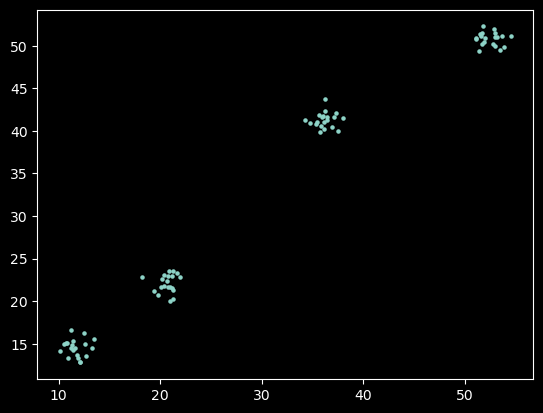

In [196]:
X = unique_nice_clustered_data(k=4, dim=2, cluster_size=20, seed=42)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()


In [212]:
class IncrClustering():
    def __init__(self, k):
        self.k = k
        self.centroids = None
        self.cluster_counts = None
        self.points=[]
    def Candidates(self, S):
        # S is set of points in X
        # run single linkage on S to get a tree
        # assign each leaf node the corresponding data point
        # move bottom-up, assign each internal node the datapoint in one of its children
        # return all points at a depth < k from the root

        # Run single linkage on S to get a tree
        Z = linkage(S, method='single', metric='euclidean')

        self.merges = Z[:, :2].astype(int)

        # list of parents
        self.N = len(S)
        self.internal_assignment = [i for i in range(0, self.N)]

        for i in range(0, len(self.merges)):
            self.internal_assignment.append(self.internal_assignment[self.merges[i][0]])

        self.traverse(self.merges[-1][0], self.merges[-1][1], self.k - 1)
        return S[self.points]

    def traverse(self, p1, p2, k):
        if k == 1:
            self.points.append(self.internal_assignment[p1])
            self.points.append(self.internal_assignment[p2])
            return
        if p1 < self.N:
            self.points.append(self.internal_assignment[p1])
        else:
            self.traverse(self.merges[p1-self.N][0], self.merges[p1-self.N][1], k-1)
        if p2 < self.N:
            self.points.append(self.internal_assignment[p2])
        else:
            self.traverse(self.merges[p2-self.N][0], self.merges[p2-self.N][1], k-1)


In [213]:
incremental_clustering = IncrClustering(k=4)
candidates = incremental_clustering.Candidates(X)
print(len(candidates))


8


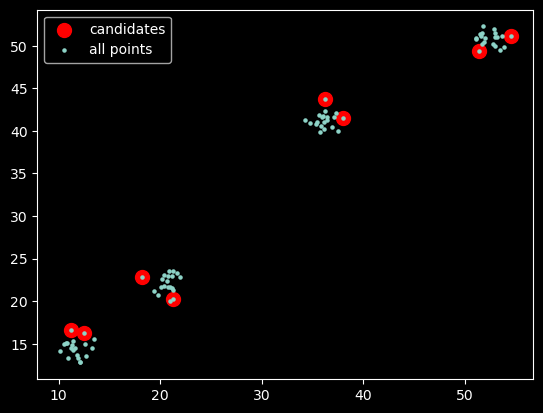

In [214]:
# plot the candidates
plt.scatter(candidates[:, 0], candidates[:, 1], s=70, c='r')
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.legend(['candidates', 'all points'])
plt.show()
